# **Inferencia estadística**
# IE08. Intervalos de confianza - SOLUCION

## <font color='blue'>__Bibliografía__</font>
* Applied Statistics and Probability for Engineers. Douglas C. Montgomery, George C. Runger, 2013.

* Estadística para Administración y Economía. Paul Newbold, William L. Carlson y Betty Thorne, 2013.

* Estadística Aplicada a los Negocios y la Economía. Allen L. Webster, 2000.

* Statistical methods for research workers. R.A. Fisher, 1925.


## <font color='blue'>__Lecturas__</font>
* Erik Cobo, Belchin Kostov, Jordi Cortés, José Antonio
González y Pilar Muñoz (2014). Intervalos de confianza. Universitat Politècnica de Catalunya. [UPC](https://upcommons.upc.edu/bitstream/handle/2117/186420/08_intervalos_de_confianza-5331.pdf)

* Le Cam, L. (1986). The Central Limit Theorem around 1935. Statistical Science. 1 (1): 78-91.

* Candia, R., & Caiozzi, G. (2005). Intervalos de confianza. Revista médica de Chile, 133(9), 1111-1115.

* Roberto Moraga-Diaz (2022). Intervalos de confianza para la varianza. [Github](https://github.com/robertomoragad/Estadistica/blob/master/Intervalo_de_Confianza_(IC)_para_varianza.ipynb)

In [ ]:
# Importamos librerias
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

## <font color='blue'>__Intervalos de Confianza__</font>
### Introducción

Un intervalo de confianza es un rango de valores calculado a partir de datos muestrales que se utiliza para estimar un parámetro desconocido de la población, como la media o la proporción. Este intervalo incluye un nivel de confianza, que indica la probabilidad de que el proceso de construcción del intervalo capture el verdadero valor del parámetro poblacional.

Por ejemplo, un intervalo de confianza del 95% para la media poblacional significa que, si se repitieran múltiples muestreos y se calcularan sus intervalos de confianza, aproximadamente el 95% de estos intervalos incluirían el verdadero valor del parámetro poblacional.

---


<img src='https://drive.google.com/uc?export=view&id=1IQlcdIKFwGhGcCccdSv3jLLmoLYSq2O-' width="300" style="margin-right: 20px">

En este caso, la línea negra horizontal representa el valor fijo de la media desconocida de la población, $\mu$. Los intervalos de confianza azules verticales que se sobreponen a la línea horizontal contienen el valor de la media de la población. El intervalo de confianza rojo que está completamente por debajo de la línea horizontal no lo contiene. Un intervalo de confianza de 95% indica que 19 de 20 muestras (95%) de la misma población producirán intervalos de confianza que contendrán el parámetro de población.

Si los valores de los parámetros son desconocidos, podemos estimarlos en base a muestras y esperamos que sean una buena aproximación al valor exacto.

---

### Importancia de los Intervalos de Confianza (ICs)

- **Estimaciones precisas**: Proveen una visión más completa de un parámetro al ofrecer un rango de valores en lugar de un único punto.
- **Toma de decisiones**: Ayudan a considerar la incertidumbre inherente en las estimaciones al diseñar políticas, productos o investigaciones.
- **Flexibilidad**: Pueden aplicarse a diferentes contextos como proporciones, medias o diferencias entre grupos.

---

### Aplicaciones Prácticas

1. **Investigación de Mercado**: Estimar el porcentaje de consumidores satisfechos con un nivel de confianza especificado.
2. **Control de Calidad**: Evaluar si el rendimiento promedio de un proceso de fabricación cumple con los estándares establecidos.
3. **Salud Pública**: Analizar encuestas de prevalencia de enfermedades y estimar el rango poblacional afectado.


## <font color='blue'>__Repaso de los fundamentos estadísticos para construir ICs__</font>

### Población vs. Muestra

- **Población**: Es el conjunto completo de elementos que se desea estudiar. Puede ser finita (un grupo específico de personas, lugares o cosas) o infinita (como un proceso continuo de producción).  
- **Muestra**: Es un subconjunto representativo de la población, utilizado para inferir características de esta. La calidad de la muestra determina la precisión de las inferencias.

---

### Error de Muestreo y Estimación

- **Error de Muestreo**: Es la diferencia entre un estadístico muestral (como la media de la muestra) y el parámetro verdadero de la población (como la media poblacional).  
- **Estimación**: Consiste en usar datos muestrales para inferir valores de parámetros poblacionales. Hay dos tipos principales:
  1. **Estimación puntual**: Se utiliza un único valor (por ejemplo, la media muestral) para estimar el parámetro.
  2. **Estimación por intervalo**: Proporciona un rango de valores donde se espera que esté el parámetro con un cierto nivel de confianza.

---

### Distribuciones Muestrales

- Un **estadístico** es cualquier función matemática calculada a partir de los datos de una muestra. Es una característica descriptiva de la muestra que se utiliza para estimar o inferir propiedades de la población de la cual proviene la muestra.

- Una **distribución muestral** es la distribución de un estadístico (como la media o la proporción) obtenido de todas las posibles muestras de un tamaño dado extraídas de la población.  
- Características clave:
  - **Media de la distribución muestral**: Igual a la media poblacional.
  - **Desviación estándar de la distribución muestral (Error estándar)**: Mide la variabilidad de los estadísticos muestrales y disminuye al aumentar el tamaño de la muestra.
- **Distribución de Medias Muestrales:** La distribución muestral del $\bar{x}$ de tamaño muestral $n$, es la distribución que resulta cuando un experimento se lleva a cabo una y otra vez (siempre con tamaño muestral $n$) y obtenemos los distintos valores de $\bar{x}$. Esta distribución, describe la variabilidad de los promedios muestrales alrededor de la media poblacional $\mu$.
  - ss

  ![Distribución medias muestrales](https://drive.google.com/uc?export=view&id=1fq0rIC_l81TnZjzp8dlwsp_6PVI8wsnd)



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sea $X$ la variable aleatoria observada de una población, y supongamos que $X$ sigue una distribución Normal:


$$X \rightarrow N(\mu, \sigma)$$


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bajo esta suposición, el estadístico muestral $\bar{x}$ también sigue una distribución normal, con media $\mu$ y desviación estándar ajustada por el tamaño de la muestra:



$$\bar{X} \rightarrow N(\mu , \frac{\sigma}{\sqrt{n}})$$

> Esta formulación es válida únicamente cuando se supone que la población tiene una distribución normal. Si $X$ no sigue una distribución normal, la distribución de $\bar{x}$ no será normal, a menos que el tamaño de la muestra n sea suficientemente grande, en cuyo caso aplica el Teorema del Límite Central, permitiendo aproximar la distribución de $\bar{x}$ a una normal.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;La distribución de probabilidad de un estadístico se llama __Distribución Muestral__.
  
  - **Distribución de Proporciones Muestrales:** La distribución muestral de la proporción muestral $\hat{p}$, para un tamaño muestral $n$, es la distribución que resulta cuando un experimento se realiza repetidamente (siempre con tamaño muestral $n$) y se calculan los distintos valores de $\hat{p}$. Esta distribución describe la variabilidad de las proporciones muestrales alrededor de la proporción poblacional $p$.
Como vemos el proceso de las __proporciones muestrales__ es muy similar al que vimos en las __medias muestrales__.


![Distribución proporciones muestrales](https://drive.google.com/uc?export=view&id=1vOhMSjMOoxIi-bePLl0eGRsdrt46bZ9f)

---

### Teorema del Límite Central

- El **Teorema del Límite Central** establece que, al aumentar el tamaño de la muestra, la distribución muestral de la media se aproxima a una distribución normal, independientemente de la distribución de la población original.  
- Este resultado es crucial para construir intervalos de confianza, ya que permite usar la distribución normal en la mayoría de los casos prácticos.

Para ilustrar el teorema del límite central, generaremos una población no normal y construiremos una distribución muestral de la media.




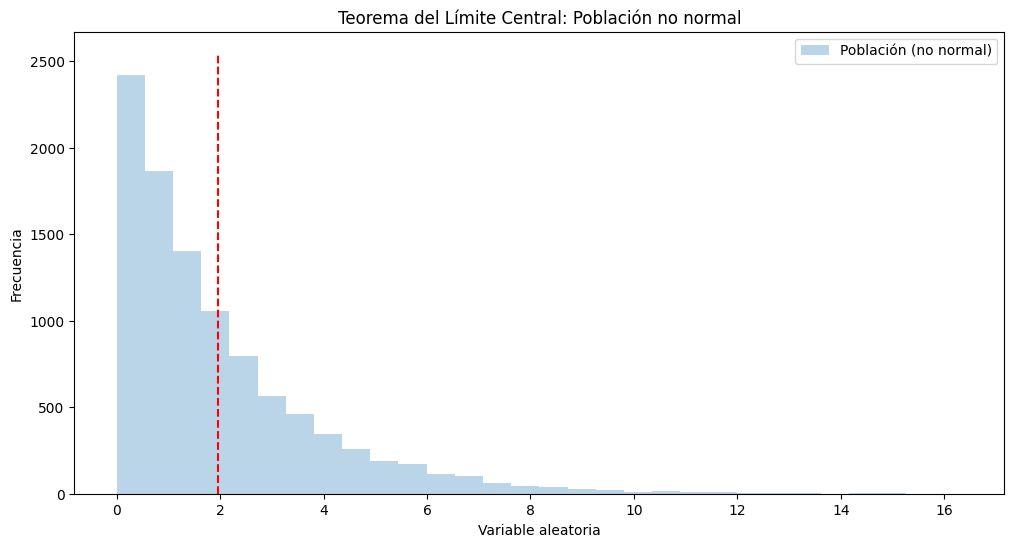

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos una semilla para reproducibilidad en los resultados
np.random.seed(42)

# Generamos una población de datos con una distribución exponencial
# scale=2 define la media de la distribución exponencial (lambda inversa)
# size=10000 define el tamaño de la población generada
poblacion = np.random.exponential(scale=2, size=10000)

# Iniciamos la figura para el gráfico
plt.figure(figsize=(12, 6))  # Configuramos el tamaño del gráfico (ancho x alto)

# Creamos un histograma de la población
# bins=30 define el número de barras (intervalos) del histograma
# alpha=0.3 establece la transparencia de las barras
# label='Población (no normal)' asigna una etiqueta al gráfico para la leyenda
plt.hist(poblacion, bins=30, alpha=0.3, label='Población (no normal)')

# Dibujamos una línea vertical en la media de la población
# np.mean(poblacion) calcula la media de los datos generados
# ymin=0 establece el inicio de la línea vertical
# ymax=plt.ylim()[1] ajusta el final de la línea al límite superior del eje Y
# color='red' define el color de la línea
# linestyle='--' establece el estilo de línea punteada
plt.vlines(np.mean(poblacion), ymin=0, ymax=plt.ylim()[1], color='red', linestyle='--')

# Agregamos un título descriptivo al gráfico
plt.title('Teorema del Límite Central: Población no normal')

# Etiquetamos el eje X con una descripción de la variable
plt.xlabel('Variable aleatoria')

# Etiquetamos el eje Y con la frecuencia de los valores
plt.ylabel('Frecuencia')

# Mostramos la leyenda para identificar los elementos del gráfico
plt.legend()

# Mostramos el gráfico generado
plt.show()



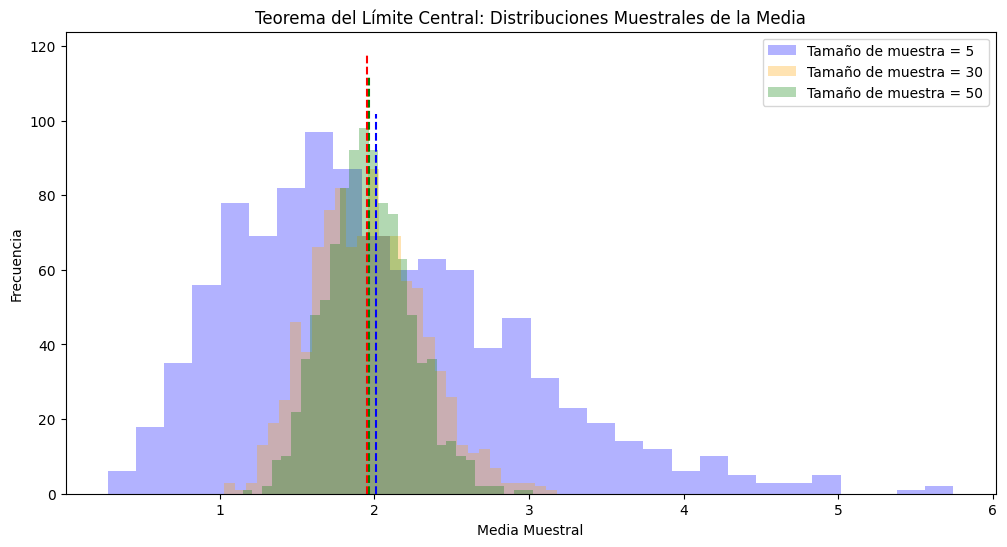

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos una función para generar la distribución muestral de la media
# La función toma como argumentos:
# - poblacion: el conjunto de datos originales (población completa)
# - tamano_muestra: el tamaño de cada muestra que se extraerá de la población
# - repeticiones: el número de veces que se extraerán muestras

def generar_distribucion_muestral(poblacion, tamano_muestra, repeticiones):
    # Utilizamos una comprensión de lista para generar múltiples medias muestrales
    # np.random.choice selecciona muestras aleatorias de la población
    # np.mean calcula la media de cada muestra seleccionada
    medias_muestrales = [
        np.mean(np.random.choice(poblacion, size=tamano_muestra, replace=True))
        for _ in range(repeticiones)
    ]
    # Devolvemos la lista de medias muestrales generadas
    return medias_muestrales

# Generar distribuciones muestrales para diferentes tamaños de muestra
# tamano_muestras contiene los diferentes tamaños de muestra que queremos probar
tamano_muestras = [5, 30, 50]  # Ejemplo: muestras pequeñas, medianas y grandes
repeticiones = 1000  # Número de repeticiones para cada tamaño de muestra
colores = ['blue', 'orange', 'green']  # Colores asignados a cada tamaño de muestra

# Iniciamos una figura para los gráficos
plt.figure(figsize=(12, 6))  # Configuramos el tamaño del gráfico (ancho x alto)

# Iteramos sobre los tamaños de muestra y sus colores asociados
for tamano, color in zip(tamano_muestras, colores):
    # Generamos la distribución muestral de la media para el tamaño de muestra actual
    medias = generar_distribucion_muestral(poblacion, tamano, repeticiones)

    # Creamos un histograma para mostrar la distribución de las medias muestrales
    # bins=30 define el número de barras (intervalos) del histograma
    # alpha=0.3 establece la transparencia de las barras
    # label describe el tamaño de muestra correspondiente
    plt.hist(medias, bins=30, alpha=0.3, label=f'Tamaño de muestra = {tamano}', color=color)

    # Dibujamos una línea vertical en la media de las medias muestrales
    # np.mean(medias) calcula la media de las medias muestrales
    # color=color aplica el color correspondiente a la línea
    # linestyle='--' establece el estilo de línea punteada
    plt.vlines(np.mean(medias), ymin=0, ymax=plt.ylim()[1], color=color, linestyle='--')

# Dibujamos una línea vertical para la media de la población original
# Esto sirve como referencia para comparar las medias muestrales
plt.vlines(np.mean(poblacion), ymin=0, ymax=plt.ylim()[1], color='red', linestyle='--')

# Agregamos un título descriptivo al gráfico
plt.title('Teorema del Límite Central: Distribuciones Muestrales de la Media')

# Etiquetamos el eje X con una descripción de la variable (medias muestrales)
plt.xlabel('Media Muestral')

# Etiquetamos el eje Y con la frecuencia de las medias muestrales
plt.ylabel('Frecuencia')

# Mostramos la leyenda para identificar los elementos del gráfico
plt.legend()

# Mostramos el gráfico generado
plt.show()


## <font color='blue'>__Componentes de los Intervalos de Confianza__</font>

Un intervalo de confianza se construye combinando información muestral y distribuciones estadísticas para generar un rango de valores que estiman un parámetro poblacional. Sus principales componentes son:

---

### **1. Estimador Puntual**

El estimador puntual es el valor central del intervalo, calculado a partir de los datos muestrales. Representa la mejor estimación del parámetro poblacional.  
Ejemplos:
- La media muestral, $\bar{x}$, estima la media poblacional, $\mu$.
- La proporción muestral, $\hat{p}$, estima la proporción poblacional, $p$.

---

### **2. Margen de Error**

El margen de error determina la amplitud del intervalo y refleja la incertidumbre en la estimación. Combina dos elementos clave:
- **Valor Crítico** ($Z_{\alpha/2}$ o $t_{\alpha/2, n-1}$):  
  - Es el número de desviaciones estándar (o error estándar) que se extienden desde el estimador puntual, basado en el nivel de confianza deseado ($1 - \alpha$).  
  - Depende de la distribución utilizada: normal estándar ($Z$) o $t$ de Student.
- **Error Estándar**:  
  - Representa la variabilidad del estimador debido al tamaño de la muestra y la dispersión de los datos.
  - Fórmulas comunes:
    - Para la media: $\frac{\sigma}{\sqrt{n}}$ o $\frac{s}{\sqrt{n}}$ (si $\sigma$ es desconocida).
    - Para la proporción: $\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$.

El margen de error completo se expresa como:
$$
E = \text{Valor Crítico} \times \text{Error Estándar}
$$

---

### **3. Nivel de Confianza**

El nivel de confianza es la probabilidad de que el intervalo construido contenga el verdadero parámetro poblacional. Se denota como $1 - \alpha$, donde $\alpha$ es la probabilidad de error. Por ejemplo:
- Un nivel de confianza del 95% implica $\alpha = 0.05$, es decir, un 5% de probabilidad de que el intervalo no incluya el parámetro.

El nivel de confianza afecta directamente al valor crítico ($Z_{\alpha/2}$ o $t_{\alpha/2, n-1}$), que a su vez define la amplitud del intervalo.

---

### **Criterio Previo para Intervalos de Confianza de Proporciones**

Antes de calcular un intervalo de confianza para una proporción, es necesario verificar si se cumple la siguiente condición:

$$
np \geq 5 \quad \text{y} \quad n(1 - p) \geq 5
$$

donde:
- $n$ es el tamaño de la muestra,  
- $p$ es la proporción muestral ($\hat{p}$).

---

### **Importancia del Criterio**
- **Validez de la aproximación normal**: La fórmula del intervalo de confianza para proporciones utiliza la distribución normal como aproximación de la distribución binomial. Esta aproximación es válida solo si tanto el número esperado de éxitos ($np$) como el de fracasos ($n(1-p)$) son mayores o iguales a 5.
- **Evita resultados inexactos**: Si no se cumple esta condición, el intervalo de confianza calculado podría ser incorrecto o poco representativo.

---

### **Fórmulas Comunes para Intervalos de Confianza**

#### __Para la media poblacional ($\mu$):__
1. **Varianza conocida**:
   $$
   IC = \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
   $$

   - $\bar{x}$: Media muestral.  
   - $Z_{\alpha/2}$: Valor crítico de la distribución normal.  
   - $\sigma$: Desviación estándar poblacional.  
   - $n$: Tamaño de la muestra.


2. **Varianza desconocida y/o nuestras pequeñas** (se usa la distribución $t$ de Student):

   $$
   IC = \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}
   $$

   - $s$: Desviación estándar muestral.  
   - $t_{\alpha/2, n-1}$: Valor crítico de la distribución $t$ con $(n-1)$ grados de libertad.

   **¿Por qué se usa la distribución $t$ de Student?**
   La distribución t de Student se utiliza en dos casos principales:
    - Cuando la varianza poblacional ($\sigma^2$) es desconocida y, por lo tanto, se debe usar la desviación estándar muestral (s).
	- Cuando el tamaño de la muestra ($n$) es pequeño ($n < 30$), incluso si la varianza se desconoce.

    Ambas condiciones introducen incertidumbre adicional, y la distribución t se ajusta a esa incertidumbre. Cuando n es suficientemente grande, la distribución t se aproxima a la distribución normal estándar (Z).

    Cuando la **varianza poblacional** ($\sigma^2$) es desconocida, la desviación estándar debe estimarse a partir de los datos muestrales. Esta estimación introduce una **incertidumbre adicional** en el cálculo del intervalo de confianza, especialmente para muestras pequeñas. En consecuencia:

    - **Error adicional por varianza desconocida**:  
   En lugar de usar la distribución normal estándar (\(Z\)), que asume una varianza poblacional conocida, se utiliza la distribución $t$ de Student, que ajusta el intervalo para reflejar esta incertidumbre.

    - **Dependencia del tamaño de muestra**:  
   La distribución $t$ es más dispersa (colas más gruesas) que la distribución normal cuando el tamaño de la muestra ($n$) es pequeño. A medida que \(n\) aumenta, la distribución $t$ se aproxima a la normal.

   - **Grados de libertad ($n-1$)**:  
   La forma de la distribución $t$ depende de los **grados de libertad** ($df = n - 1\$), que están relacionados con el tamaño de la muestra. Menor tamaño de muestra implica mayor dispersión de la distribución.




#### __Para la proporción poblacional ($p$):__

Cuando se estima una proporción poblacional $p$ (como la proporción de éxito en un muestreo binomial), el intervalo de confianza se calcula utilizando la distribución normal $Z$, siempre que se cumpla la condición previa:

$$
np \geq 5 \quad \text{y} \quad n(1 - p) \geq 5
$$

La fórmula para el intervalo de confianza es:

$$
IC = \hat{p} \pm Z_{\alpha/2} \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

- $\hat{p}$: Proporción muestral (\(\hat{p} = \frac{x}{n}\), donde \(x\) son los éxitos).  
- $Z_{\alpha/2}$: Valor crítico de la distribución normal estándar.  
- $n$: Tamaño de la muestra.


__NOTA:__ Si las condiciones no se cumplen $(np < 5$ o $n(1-p) < 5)$, la distribución binomial ya no puede aproximarse con una distribución normal. En ese caso, se debe recurrir a métodos exactos para calcular el intervalo de confianza, como el Intervalo Exacto de Clopper-Pearson o métodos bayesianos, que no dependen de la aproximación normal.

---

### **Relación Consolidada**

El intervalo de confianza se construye como:

$$
IC = \text{Estimador Puntual} \pm (\text{Valor Crítico} \cdot \text{Error Estándar})
$$

Esta fórmula refleja cómo el nivel de confianza, el valor crítico y la variabilidad de los datos determinan la amplitud del intervalo. Cada uno de estos componentes es fundamental para interpretar correctamente los resultados.

### <font color='blue'> Ejemplo de Distribución de Medias Muestrales y cálculos de probabilidades</font>

__Problema:__

El diámetro de las tortas de Girasol se __distribuye normalmente__ con media 18 cm y desviación estandar de 6 cm. En una muestra de 10 tortas, ¿Cuál es la probabilidad de encontrar tortas de diámetro promedio inferior a 16 cm?

1. Calcularemos los estadísticos
2. Visualizaremos la Función de Densidad de Probabilidad de la población y de las muestras.
3. Calcularemos la propabilidad solicitada.

Media poblacional (mu): 18 cm
Desviación estándar poblacional (sigma): 6 cm
Error estándar de la media: 1.90 cm
Valor Z: -1.05
Probabilidad de que la media muestral sea < 16 cm: 0.1459


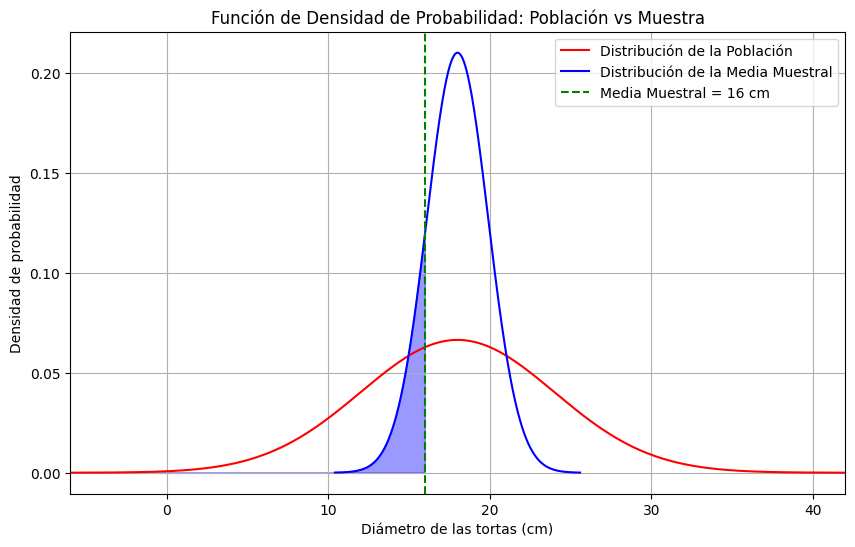

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Solución en los siguientes pasos:
# 1. Calcularemos los estadísticos.
# 2. Visualizaremos la Función de Densidad de Probabilidad (FDP) de la población y la distribución muestral.
# 3. Calcularemos la probabilidad solicitada utilizando la distribución normal.

# Parámetros del problema
mu = 18  # Media poblacional
sigma = 6  # Desviación estándar poblacional
n = 10  # Tamaño de la muestra
x_barra = 16  # Valor objetivo: media muestral < 16 cm

# 1. Estadísticos
# Calculamos el error estándar de la media (sigma_muestral), que mide la variabilidad de la media muestral.
sigma_muestral = sigma / np.sqrt(n)  # Fórmula: sigma / sqrt(n)

# 2. Cálculo de la probabilidad
# Calculamos el estadístico Z para estandarizar el valor de la media muestral objetivo.
z = (x_barra - mu) / sigma_muestral  # Fórmula: (x_barra - mu) / sigma_muestral

# Usamos la función de distribución acumulativa (CDF) para encontrar la probabilidad acumulada hasta Z.
probabilidad = norm.cdf(z)  # P(X_bar < x_barra)

# Imprimir resultados
print(f"Media poblacional (mu): {mu} cm")
print(f"Desviación estándar poblacional (sigma): {sigma} cm")
print(f"Error estándar de la media: {sigma_muestral:.2f} cm")
print(f"Valor Z: {z:.2f}")
print(f"Probabilidad de que la media muestral sea < 16 cm: {probabilidad:.4f}")

# 3. Visualización
# Creamos valores de x para graficar la Función de Densidad de Probabilidad (FDP) de la población.
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)  # Valores dentro de 4 desviaciones estándar de la media
# Calculamos la FDP de la población con media mu y desviación estándar sigma.
y = norm.pdf(x, mu, sigma)  # Fórmula de la FDP de la población

# Creamos valores de x para graficar la distribución de la media muestral.
x_muestral = np.linspace(mu - 4 * sigma_muestral, mu + 4 * sigma_muestral, 1000)
# Calculamos la FDP de la media muestral con media mu y desviación estándar sigma_muestral.
y_muestral = norm.pdf(x_muestral, mu, sigma_muestral)

# Gráfico
plt.figure(figsize=(10, 6))
# Graficamos la FDP de la población.
plt.plot(x, y, label="Distribución de la Población", color="red")
# Graficamos la FDP de la media muestral.
plt.plot(x_muestral, y_muestral, label="Distribución de la Media Muestral", color="blue")
# Marcamos la posición de x_barra con una línea vertical punteada.
plt.axvline(x_barra, color="green", linestyle="--", label=f"Media Muestral = {x_barra} cm")

# Sombrear el área bajo la curva hasta x_barra (probabilidad acumulada).
x_fill = np.linspace(-100, x_barra, 1000)  # Valores para sombrear hasta x_barra
plt.fill_between(x_fill, norm.pdf(x_fill, mu, sigma_muestral), alpha=0.4, color="blue")

# Configuramos los límites del eje x para que abarque 4 desviaciones estándar alrededor de la media.
plt.xlim(mu - 4 * sigma, mu + 4 * sigma)

# Configuración del gráfico
plt.title("Función de Densidad de Probabilidad: Población vs Muestra")
plt.xlabel("Diámetro de las tortas (cm)")
plt.ylabel("Densidad de probabilidad")
plt.legend()  # Mostramos la leyenda
plt.grid()  # Agregamos una cuadrícula para mayor claridad
plt.show()  # Mostramos el gráfico



### <font color='blue'> **Ejemplo de Distribución de Proporciones Muestrales y cálculos de probabilidades**</font>
**Problema:**  
En una población de **10.000 clientes**, el **60%** de ellos están satisfechos ($p = 0.6$), mientras que el **40%** no lo está ($1-p = 0.4$). Queremos:  

1. Crear una población ficticia con estos parámetros.  
2. Extraer múltiples muestras y calcular la **proporción muestral** ($\hat{p}$) para cada una.  
3. Graficar la distribución de las proporciones muestrales y compararla con la distribución binomial.


Proporción poblacional: 0.6108
Desviación estándar poblacional: 0.4876
Otra forma de sigma (teórico): 0.4876


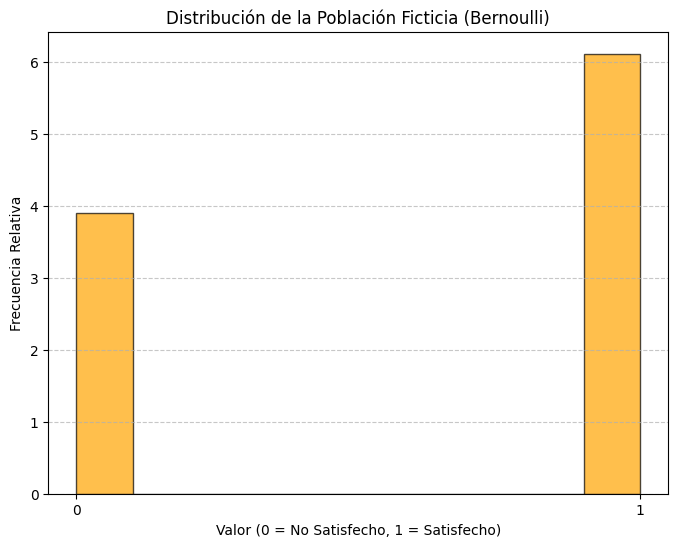

In [ ]:
from scipy.stats import binom, norm

# Parámetros del problema
N = 10000  # Tamaño de la población
p = 0.6    # Proporción de clientes satisfechos
n_muestra = 50  # Tamaño de la muestra

# 1. Crear una población ficticia
from scipy.stats import binom, norm

# Parámetros del problema
N = 10000  # Tamaño de la población
p = 0.6    # Proporción de clientes satisfechos
n_muestra = 50  # Tamaño de la muestra

# Crear una población ficticia usando bernoulli
np.random.seed(42)
poblacion = np.random.binomial(1, p, size=N)  # 1 = éxito, 0 = fracaso

# Estadísticas de la población
media_poblacional = np.mean(poblacion)
desviacion_poblacional = np.std(poblacion)

print(f'Proporción poblacional: {media_poblacional:.4f}')
print(f'Desviación estándar poblacional: {desviacion_poblacional:.4f}')

# Otra forma de calcular sigma usando la fórmula teórica de Bernoulli
sigma_teorico = np.sqrt(media_poblacional * (1 - media_poblacional))
print(f'Otra forma de sigma (teórico): {sigma_teorico:.4f}')

# 3. Gráfico de la distribución poblacional
plt.figure(figsize=(8, 6))
plt.hist(poblacion, density=True, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribución de la Población Ficticia (Bernoulli)")
plt.xlabel("Valor (0 = No Satisfecho, 1 = Satisfecho)")
plt.ylabel("Frecuencia Relativa")
plt.xticks([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Media de las proporciones muestrales: 0.6140
Error estándar teórico: 0.0693


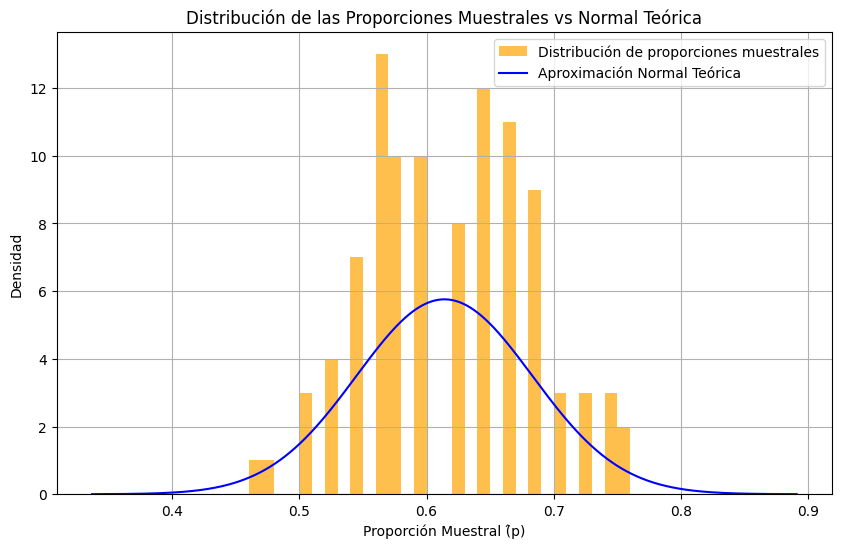

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 2. Extraer múltiples muestras y calcular la proporción muestral
# num_muestras: Número de muestras aleatorias a extraer de la población
num_muestras = 100
# Lista para almacenar las proporciones muestrales calculadas
proporciones_muestrales = []

# Iteramos para generar num_muestras muestras aleatorias de la población
for i in range(num_muestras):
    # Seleccionamos una muestra aleatoria de la población
    # size=n_muestra especifica el tamaño de cada muestra
    # replace=False asegura que no se repitan elementos en la muestra
    muestra = np.random.choice(poblacion, size=n_muestra, replace=False)
    # Calculamos la proporción muestral como la media de la muestra (proporción de éxitos)
    proporciones_muestrales.append(np.mean(muestra))

# Resultados intermedios
# media_proporciones: Media de las proporciones muestrales calculadas
media_proporciones = np.mean(proporciones_muestrales)
# error_estandar_teorico: Error estándar teórico de las proporciones muestrales
# Fórmula: sqrt(p * (1 - p) / n_muestra)
error_estandar_teorico = np.sqrt((p * (1 - p)) / n_muestra)

# Imprimimos los resultados
print(f"Media de las proporciones muestrales: {media_proporciones:.4f}")  # Promedio de proporciones
print(f"Error estándar teórico: {error_estandar_teorico:.4f}")  # Error estándar esperado

# 3. Visualización de la distribución muestral de proporciones
plt.figure(figsize=(10, 6))  # Configuramos el tamaño del gráfico

# Histograma de las proporciones muestrales
# bins=30 define el número de barras (intervalos) en el histograma
# density=True normaliza las frecuencias para que representen densidades
# color='orange' establece el color de las barras
# alpha=0.7 ajusta la transparencia de las barras
# label etiqueta la distribución muestral para la leyenda
plt.hist(proporciones_muestrales, bins=30, density=True, color='orange', alpha=0.7, label="Distribución de proporciones muestrales")

# Superponer la distribución normal teórica
# Creamos valores de x para representar la curva normal
# El rango abarca desde media - 4*error_estándar hasta media + 4*error_estándar
x = np.linspace(media_proporciones - 4*error_estandar_teorico, media_proporciones + 4*error_estandar_teorico, 1000)
# Calculamos la densidad de probabilidad normal con media y desviación estándar teóricas
y = norm.pdf(x, media_proporciones, error_estandar_teorico)
# Graficamos la curva de la distribución normal teórica
plt.plot(x, y, color='blue', label="Aproximación Normal Teórica")

# Configuración del gráfico
# Título del gráfico
plt.title("Distribución de las Proporciones Muestrales vs Normal Teórica")
# Etiqueta del eje X
plt.xlabel("Proporción Muestral (̂p)")
# Etiqueta del eje Y
plt.ylabel("Densidad")
# Mostrar leyenda para identificar elementos del gráfico
plt.legend()
# Agregar cuadrícula para mejorar la visualización
plt.grid()
# Mostrar el gráfico generado
plt.show()


### <font color='blue'>**Test de Normalidad**</font>

Para comprobar si los datos muestrales siguen una distribución normal, utilizaremos el **Test de Anderson-Darling**, que evalúa la siguiente hipótesis:

- **$H_0$**: Los datos **siguen** una distribución normal.  
- **$H_1$**: Los datos **NO siguen** una distribución normal.

---

### **Interpretación del Test de Anderson-Darling**
- Si el valor estadístico del test es **menor** al valor crítico dado para un nivel de significancia (e.g., 5%), **no se rechaza** la hipótesis $H_0$ (los datos siguen una distribución normal).  
- Si el valor estadístico es **mayor** que el valor crítico, se **rechaza** la hipótesis $H_0$, concluyendo que los datos no siguen una distribución normal.

Adicionalmente, generaremos una **Gráfica de Probabilidad Normal** usando `probplot` de Scipy, la cual compara los datos muestrales con los cuantiles teóricos de una distribución normal. Si los puntos siguen una línea recta, los datos cumplen con la normalidad.


In [ ]:
from scipy.stats import anderson, probplot

# Resultados intermedios de proporciones muestrales ya calculadas
# Imprimimos la media de las proporciones muestrales
print(f"Media de las proporciones muestrales: {media_proporciones:.4f}")
# Imprimimos el error estándar teórico calculado previamente
print(f"Error estándar teórico: {error_estandar_teorico:.4f}")

# Test de Anderson-Darling para comprobar la normalidad de los datos
# proporciones_muestrales: Lista con las proporciones muestrales calculadas
# dist='norm': Especificamos que queremos probar la normalidad
resultado_ad = anderson(proporciones_muestrales, dist='norm')

# Imprimimos los resultados del test de Anderson-Darling
print("\nResultados del Test de Anderson-Darling:")
# Estadístico de prueba obtenido
print(f"Estadístico de prueba: {resultado_ad.statistic:.4f}")

# Iteramos sobre los valores críticos y niveles de significancia
for i in range(len(resultado_ad.critical_values)):
    # Obtenemos el nivel de significancia correspondiente
    nivel_significancia = resultado_ad.significance_level[i]
    # Obtenemos el valor crítico correspondiente
    valor_critico = resultado_ad.critical_values[i]
    # Imprimimos el nivel de significancia y el valor crítico
    print(f"Nivel de significancia: {nivel_significancia:.1f}% | Valor crítico: {valor_critico:.4f}")

# Interpretación del resultado basado en el nivel de significancia del 5%
# Si el estadístico es menor que el valor crítico al 5%, no se rechaza H0
if resultado_ad.statistic < resultado_ad.critical_values[2]:  # Nivel del 5%
    print("\nNo se rechaza H0: Las proporciones muestrales siguen una distribución normal.")
else:
    # Si el estadístico es mayor, se rechaza H0
    print("\nSe rechaza H0: Las proporciones muestrales NO siguen una distribución normal.")




Media de las proporciones muestrales: 0.6140
Error estándar teórico: 0.0693

Resultados del Test de Anderson-Darling:
Estadístico de prueba: 0.6249
Nivel de significancia: 15.0% | Valor crítico: 0.5550
Nivel de significancia: 10.0% | Valor crítico: 0.6320
Nivel de significancia: 5.0% | Valor crítico: 0.7590
Nivel de significancia: 2.5% | Valor crítico: 0.8850
Nivel de significancia: 1.0% | Valor crítico: 1.0530

No se rechaza H0: Las proporciones muestrales siguen una distribución normal.


#### ProbPlot:
El `probplot` genera una gráfica de probabilidad (Probability Plot) que compara los cuantiles de los datos observados con los cuantiles teóricos de una distribución específica, como la normal. Esta herramienta permite evaluar visualmente si los datos siguen la distribución esperada. Si los puntos de los datos observados caen cerca de una línea recta, se puede concluir que los datos tienen un buen ajuste a la distribución teórica. En caso de desviaciones significativas, especialmente en los extremos, se sugiere que los datos no siguen la distribución asumida.

En la gráfica:
- El eje X (cuantiles teóricos) muestra los valores esperados si los datos siguieran una distribución normal.
- El eje Y (cuantiles de las proporciones muestrales) representa los valores observados de las proporciones muestrales.

Interpretación:
Si los puntos se alinean aproximadamente en una línea recta, esto indica que los datos siguen una distribución normal. Desviaciones significativas de esta línea, especialmente en los extremos (colas), sugieren que los datos no cumplen con la normalidad. La gráfica es una herramienta complementaria a los tests formales de normalidad, como Anderson-Darling.

### ¿Cómo funciona `probplot`?

#### Datos observados:
- Ordena los datos muestrales en forma ascendente.

#### Cuantiles teóricos:
- Calcula los cuantiles teóricos de la distribución especificada (por defecto, la normal).

#### Comparación:
- Traza los cuantiles observados en el eje \(Y\) contra los cuantiles teóricos en el eje \(X\).
- Si los datos siguen la distribución teórica, los puntos deberían alinearse en una línea recta.



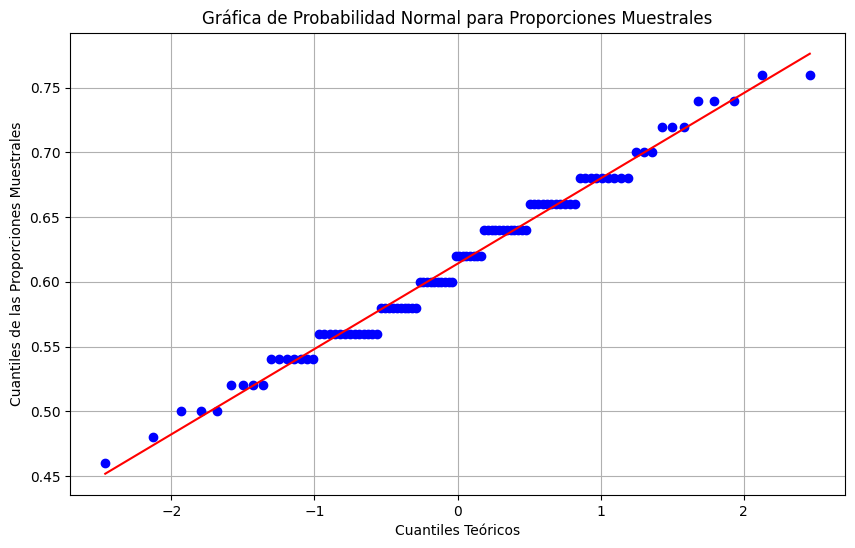

In [ ]:
# Gráfica de Probabilidad Normal
plt.figure(figsize=(10, 6))
probplot(proporciones_muestrales, dist="norm", plot=plt)
plt.title("Gráfica de Probabilidad Normal para Proporciones Muestrales")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de las Proporciones Muestrales")
plt.grid()
plt.show()

### <font color='green'>Actividad 1</font>

Una población de fuentes de alimentación para micro-computadores tiene un voltaje de salida (output) que sigue una distribución normal de media 5 voltios y desviación estándar 0.1 voltios. Se extrae una muestra aleatoria simple de 8 alimentadores.

1. Obtener la distribución de $\bar{x}$
2. Hallar la probabilidad de que el valor de $\bar{x}$ se desvíe en más de 0.05 voltios de la media poblacional $\mu$ conocida.


Una población de fuentes de alimentación para microcomputadores tiene un voltaje de salida que sigue una distribución normal con una media poblacional de $\mu = 5$ voltios y una desviación estándar de $\sigma = 0.1$ voltios. Se extrae una muestra aleatoria simple de tamaño $n = 8$. Se requiere:
	1.	Determinar la distribución de $\bar{x}$ (la media muestral).
	2.	Calcular la probabilidad de que la media muestral $\bar{x}$ se desvíe en más de 0.05 voltios de la media poblacional $\mu$.
	3.	Visualizar las distribuciones de la población, las medias muestrales y la región correspondiente al límite de desviación.

Nota: Como la población sigue una distribución normal y se conoce \sigma, se puede asumir que $\bar{x} \sim N\left(\mu, \frac{\sigma}{\sqrt{n}}\right)$, incluso para muestras pequeñas ($n < 30$).

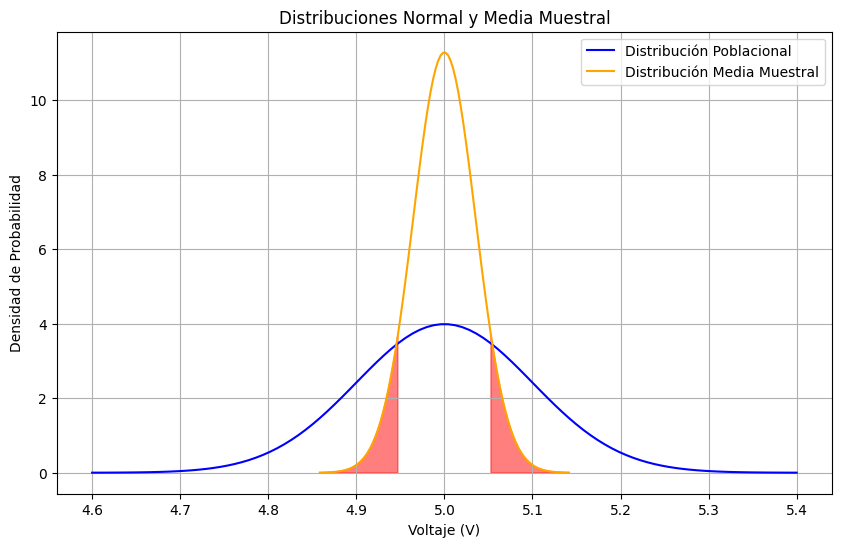

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parámetros
mu = 5
sigma = 0.1
n = 8
sigma_x_bar = sigma / np.sqrt(n)

# Valores para el gráfico
x_population = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y_population = stats.norm.pdf(x_population, mu, sigma)

x_sample_mean = np.linspace(mu - 4*sigma_x_bar, mu + 4*sigma_x_bar, 100)
y_sample_mean = stats.norm.pdf(x_sample_mean, mu, sigma_x_bar)

# Gráficos
plt.figure(figsize=(10,6))
plt.plot(x_population, y_population, label='Distribución Poblacional', color='blue')
plt.plot(x_sample_mean, y_sample_mean, label='Distribución Media Muestral', color='orange')

# Marcar límites de desviación
plt.fill_between(x_sample_mean, y_sample_mean, where=(x_sample_mean < mu - 0.05) | (x_sample_mean > mu + 0.05), color='red', alpha=0.5)

plt.title('Distribuciones Normal y Media Muestral')
plt.xlabel('Voltaje (V)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid()
plt.show()



<font color='green'>Fin actividad 1</font>

### <font color='green'>Actividad 2</font>

En una universidad, se sabe que el 60% de los estudiantes fuman cigarrillos (p = 0.6). Se toma una muestra aleatoria simple de tamaño n = 800. Se requiere:

1.	Calcular la probabilidad de que la proporción muestral de estudiantes que fuman cigarrillos ($\hat{p}$) sea menor que 0.55.
2.	Visualizar la distribución muestral de $\hat{p}$ y marcar el límite de 0.55.

Nota: Debido al gran tamaño de la muestra ($n = 800$), podemos asumir que la distribución muestral de $\hat{p}$ sigue una distribución normal con media $p = 0.6$ y error estándar:


$$\sigma_{\hat{p}} = \sqrt{\frac{p(1-p)}{n}}$$


La probabilidad de que p̂ sea menor que 0.55 es: 0.0019


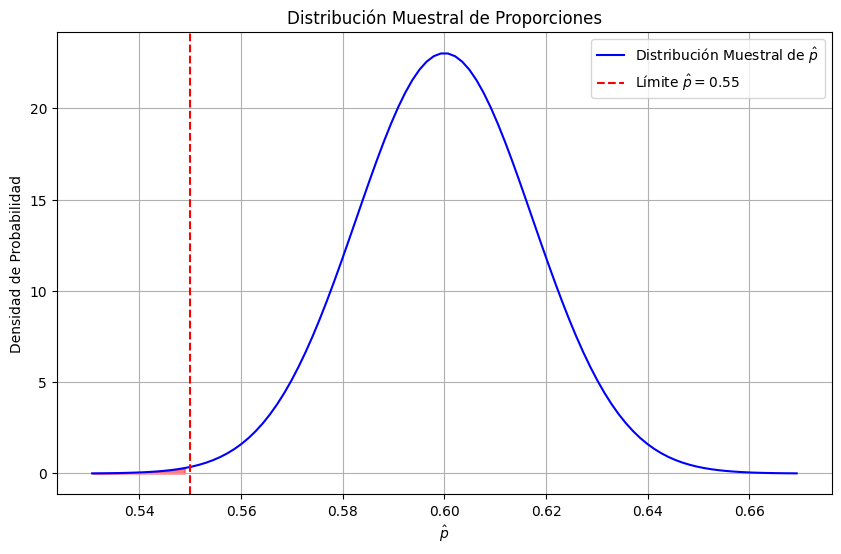

In [3]:
# Tu código aquí ...

# Parámetros
p = 0.6
n = 800
mu_p_hat = p
sigma_p_hat = np.sqrt(p * (1 - p) / n)

# Calcular la probabilidad P(p̂ < 0.55)
p_hat_value = 0.55
z_score = (p_hat_value - mu_p_hat) / sigma_p_hat
probability = norm.cdf(z_score)

# Imprimir la probabilidad
print(f"La probabilidad de que p̂ sea menor que 0.55 es: {probability:.4f}")

# Visualización de la distribución muestral de p̂
x = np.linspace(mu_p_hat - 4*sigma_p_hat, mu_p_hat + 4*sigma_p_hat, 100)
y = norm.pdf(x, mu_p_hat, sigma_p_hat)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución Muestral de $\\hat{p}$', color='blue')
plt.axvline(x=p_hat_value, color='red', linestyle='--', label='Límite $\\hat{p} = 0.55$')
plt.fill_between(x, y, where=(x < p_hat_value), color='red', alpha=0.5)

plt.title('Distribución Muestral de Proporciones')
plt.xlabel('$\\hat{p}$')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid()
plt.show()





<font color='green'>Fin actividad 2</font>

### <font color='blue'>**Ejemplo de IC de media poblacional para muestras grandes**</font>

Se realizó un estudio para evaluar la satisfacción de los clientes de la nueva aplicación de compras “cornerTop”. A una muestra aleatoria de n = 172 clientes se les pidió calificar su experiencia de compra en una escala de 1 a 5. Los resultados arrojaron:
- Media muestral, $\bar{x} = 4.38$
- Desviación estándar muestral,  $S = 0.70$

Con base en estos datos:
1. Calcule los Intervalos de Confianza (IC) del 95% y 99% para la media poblacional (\mu).
2. Visualice la distribución muestral junto con los límites de los intervalos de confianza.

Intervalo de Confianza al 95%: [4.28, 4.48] (Z=1.9600)
Intervalo de Confianza al 99%: [4.24, 4.52] (Z=2.5758)


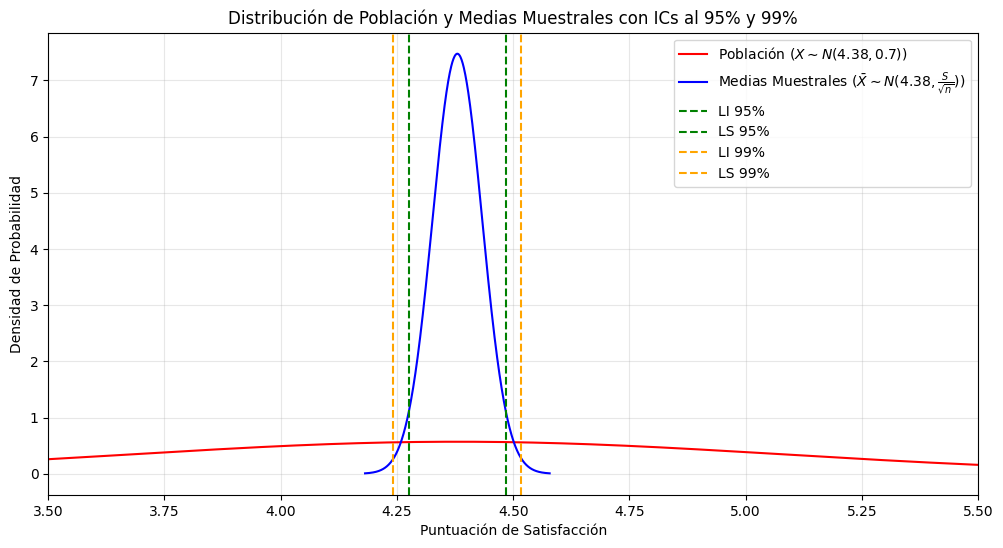

In [4]:

# Datos iniciales
# n: Tamaño de la muestra
n = 172
# xbar: Media muestral
xbar = 4.38
# S: Desviación estándar muestral
S = 0.7

# Función para calcular Intervalos de Confianza
# La función toma como argumentos:
# - n: Tamaño de la muestra
# - xbar: Media muestral
# - S: Desviación estándar muestral
# - NC: Nivel de confianza (en formato decimal, ej. 0.95 para 95%)
def calcular_ic(n, xbar, S, NC):
    # Calculamos alpha (nivel de significancia)
    alpha = 1 - NC
    # Calculamos el valor crítico Z utilizando la distribución normal estándar
    Z = norm.ppf(1 - alpha / 2)
    # Calculamos el margen de error como Z multiplicado por el error estándar de la media
    margen_error = Z * (S / np.sqrt(n))
    # Calculamos el límite inferior (LI) del intervalo de confianza
    LI = xbar - margen_error
    # Calculamos el límite superior (LS) del intervalo de confianza
    LS = xbar + margen_error
    # Devolvemos los límites del intervalo y el valor crítico Z
    return LI, LS, Z

# Calcular Intervalos de Confianza (ICs) para niveles de confianza del 95% y 99%
# LI_95, LS_95: Límite inferior y superior para el 95%
# Z_95: Valor crítico Z para el 95%
LI_95, LS_95, Z_95 = calcular_ic(n, xbar, S, 0.95)
# LI_99, LS_99: Límite inferior y superior para el 99%
# Z_99: Valor crítico Z para el 99%
LI_99, LS_99, Z_99 = calcular_ic(n, xbar, S, 0.99)

# Mostrar los resultados de los intervalos de confianza
print(f"Intervalo de Confianza al 95%: [{LI_95:.2f}, {LS_95:.2f}] (Z={Z_95:.4f})")
print(f"Intervalo de Confianza al 99%: [{LI_99:.2f}, {LS_99:.2f}] (Z={Z_99:.4f})")

# Visualización de las distribuciones
# Calculamos la desviación estándar de la media muestral (S_xbar)
S_xbar = S / np.sqrt(n)

# Distribución de la población
# Creamos una distribución normal para la población con media xbar y desviación estándar S
poblacion = norm(xbar, S)
# Generamos puntos en el eje X desde el percentil 0.01% hasta el 99.99% de la distribución
x_poblacion = np.linspace(poblacion.ppf(0.0001), poblacion.ppf(0.9999), 500)
# Calculamos la función de densidad de probabilidad (PDF) de la población
pdf_poblacion = poblacion.pdf(x_poblacion)

# Distribución de las medias muestrales
# Creamos una distribución normal para las medias muestrales con desviación estándar S_xbar
medias = norm(xbar, S_xbar)
# Generamos puntos en el eje X desde el percentil 0.01% hasta el 99.99% de la distribución
x_medias = np.linspace(medias.ppf(0.0001), medias.ppf(0.9999), 500)
# Calculamos la función de densidad de probabilidad (PDF) de las medias muestrales
pdf_medias = medias.pdf(x_medias)

# Gráficos
plt.figure(figsize=(12, 6))  # Configuramos el tamaño del gráfico

# Graficamos la PDF de la población
plt.plot(x_poblacion, pdf_poblacion, 'r', label='Población ($X \sim N(4.38, 0.7)$)')
# Graficamos la PDF de las medias muestrales
plt.plot(x_medias, pdf_medias, 'b', label='Medias Muestrales ($\\bar{X} \\sim N(4.38, \\frac{S}{\\sqrt{n}})$)')


# Dibujamos líneas verticales para los límites inferiores y superiores de los ICs al 95%
plt.axvline(LI_95, color='green', linestyle='--', label='LI 95%')
plt.axvline(LS_95, color='green', linestyle='--', label='LS 95%')

# Dibujamos líneas verticales para los límites inferiores y superiores de los ICs al 99%
plt.axvline(LI_99, color='orange', linestyle='--', label='LI 99%')
plt.axvline(LS_99, color='orange', linestyle='--', label='LS 99%')

# Título del gráfico
plt.title('Distribución de Población y Medias Muestrales con ICs al 95% y 99%')
# Etiqueta del eje X
plt.xlabel('Puntuación de Satisfacción')
# Etiqueta del eje Y
plt.ylabel('Densidad de Probabilidad')

# Configuración del rango en el eje X (opcional)
plt.xlim(3.5, 5.5)

# Mostrar leyenda para identificar los elementos del gráfico
plt.legend()
# Agregar cuadrícula para mejorar la visualización
plt.grid(alpha=0.3)
# Mostrar el gráfico generado
plt.show()


In [ ]:
# Forma simple usando Scipy para calcular ICs
NC_95 = 0.95
NC_99 = 0.99

IC95 = norm.interval(NC_95, loc=xbar, scale=S_xbar)
IC99 = norm.interval(NC_99, loc=xbar, scale=S_xbar)

# Resultados
print(f"Intervalo de Confianza al 95% (forma simple): [{IC95[0]:.2f}, {IC95[1]:.2f}]")
print(f"Intervalo de Confianza al 99% (forma simple): [{IC99[0]:.2f}, {IC99[1]:.2f}]")


Intervalo de Confianza al 95% (forma simple): [4.28, 4.48]
Intervalo de Confianza al 99% (forma simple): [4.24, 4.52]


### <font color='green'>Actividad 3: IC de Media Poblacional y muestras pequeñas</font>
Un artículo publicado en el Journal of Testing and Evaluation presenta 20 mediciones del tiempo de combustión residual (en segundos) de especímenes tratados de ropa de dormir para niños. Los datos proporcionados son los siguientes:

```python
tiempo = (9.85, 9.93, 9.75, 9.77, 9.67, 9.87, 9.67, 9.94, 9.85, 9.75, 9.83, 9.92, 9.74, 9.99, 9.88, 9.95, 9.95, 9.93, 9.92, 9.89)
```
1. Se desea encontrar un IC del 95% para el tiempo de combustión residual promedio.

In [ ]:
tiempo = (9.85, 9.93, 9.75, 9.77, 9.67, 9.87, 9.67, 9.94, 9.85, 9.75,
          9.83, 9.92, 9.74, 9.99, 9.88, 9.95, 9.95, 9.93, 9.92, 9.89)

In [5]:
# Tu código aquí ...
# n < 30, y se desconoce la desv. std poblacional, por tanto aplicar T (distribucion de Student)

# Datos
tiempo = np.array([9.85, 9.93, 9.75, 9.77, 9.67, 9.87, 9.67,
                   9.94, 9.85, 9.75, 9.83, 9.92, 9.74,
                   9.99, 9.88, 9.95, 9.95, 9.93,
                   9.92, 9.89])

# Calcular la media y la desviación estándar
media = np.mean(tiempo)
desviacion_estandar = np.std(tiempo, ddof=1)  # ddof=1 para la muestra

# Tamaño de la muestra
n = len(tiempo)

# Error estándar de la media
error_estandar = desviacion_estandar / np.sqrt(n)

# Valor crítico t para un IC del 95%
alpha = 0.05
t_critico = stats.t.ppf(1 - alpha/2, df=n-1)

# Calcular el intervalo de confianza
margen_error = t_critico * error_estandar
ic_inferior = media - margen_error
ic_superior = media + margen_error

# Resultados
print(f"Media: {media:.4f}")
print(f"Desviación Estándar: {desviacion_estandar:.4f}")
print(f"Error Estándar: {error_estandar:.4f}")
print(f"Valor crítico t: {t_critico:.4f}")
print(f"Intervalo de Confianza del 95%: ({ic_inferior:.4f}, {ic_superior:.4f})")



Media: 9.8525
Desviación Estándar: 0.0965
Error Estándar: 0.0216
Valor crítico t: 2.0930
Intervalo de Confianza del 95%: (9.8074, 9.8976)


<font color='green'>Fin actividad 3</font>

### <font color='blue'>**Ejemplo de IC en proporciones**</font>

En una ciudad, se selecciona aleatoriamente una muestra de 600 personas y se les pregunta si consideran que el tráfico es aceptablemente fluido. 250 personas responden afirmativamente.

Objetivo:

Calcular el intervalo de confianza del 90% para la proporción poblacional de ciudadanos que consideran aceptable la fluidez del tráfico.


In [ ]:
import numpy as np
from scipy.stats import norm

# Datos iniciales
# n: Tamaño de la muestra
n = 600
# x: Número de éxitos (respuestas afirmativas)
x = 250
# p: Proporción muestral calculada como número de éxitos entre el tamaño de la muestra
p = x / n
# S: Desviación estándar de la proporción muestral
# Fórmula: sqrt(p * (1 - p))
S = np.sqrt(p * (1 - p))

# Nivel de confianza
# NC: Nivel de confianza especificado (en formato decimal, ej. 0.90 para 90%)
NC = 0.90
# alpha: Nivel de significancia (1 - NC)
alpha = 1 - NC
# alpha_medio: Mitad del nivel de significancia (para dos colas)
alpha_medio = alpha / 2

# Valor crítico Z para dos colas
# norm.ppf calcula el percentil de la distribución normal estándar
# El valor crítico corresponde al percentil superior (1 - alpha_medio)
Z = norm.ppf(1 - alpha_medio)

# Cálculo manual del intervalo de confianza
# LI: Límite inferior del intervalo de confianza
LI = p - Z * (S / np.sqrt(n))
# LS: Límite superior del intervalo de confianza
LS = p + Z * (S / np.sqrt(n))

# Resultados
print("Cálculo del Intervalo de Confianza del 90%:")
# Mostramos la proporción muestral
print(f"Proporción muestral (p̂): {p:.4f}")
# Mostramos la desviación estándar muestral
print(f"Desviación estándar muestral: {S:.4f}")
# Mostramos el valor crítico Z
print(f"Valor crítico Z: {Z:.4f}")
# Mostramos los límites del intervalo de confianza calculado manualmente
print(f"Intervalo de Confianza (90%): [{LI:.4f}, {LS:.4f}]")
print()

# Cálculo del intervalo de confianza usando Scipy
# norm.interval calcula automáticamente el intervalo de confianza
# loc=p establece la media (proporción muestral)
# scale=S/np.sqrt(n) establece el error estándar
IC90 = norm.interval(NC, loc=p, scale=S / np.sqrt(n))

# Mostramos el intervalo de confianza calculado automáticamente
print(f"IC al 90% para la proporción poblacional (forma simple): [{IC90[0]:.4f}, {IC90[1]:.4f}]")


Cálculo del Intervalo de Confianza del 90%:
Proporción muestral (p̂): 0.4167
Desviación estándar muestral: 0.4930
Valor crítico Z: 1.6449
Intervalo de Confianza (90%): [0.3836, 0.4498]

IC al 90% para la proporción poblacional (forma simple): [0.3836, 0.4498]


### <font color='green'>Actividad 4</font>

Una de las últimas encuestas sobre los candidatos a las elecciones de diciembre del 2005 indica que la candidata Marta Mujica obtiene un 49% de las preferencias.

La ficha técnica de la muestra proporciona los siguientes datos:
- Tamaño de la muestra ($n$): 830
- Proporción muestral ($p$): 0.49
- Nivel de confianza: 95%
- Error muestral: 0.034

Objetivo

1. Construir el intervalo de confianza del 95% para la proporción poblacional.
2. Comparar el error muestral calculado con el proporcionado en la ficha técnica.

In [6]:
# Tu código aqui ...

# Datos
p_hat = 0.49  # Proporción muestral
n = 830       # Tamaño de la muestra
nivel_confianza = 0.95

# Calcular el error estándar
sigma_p_hat = np.sqrt(p_hat * (1 - p_hat) / n)

# Valor crítico Z para un nivel de confianza del 95%
z_alpha_over_2 = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el margen de error
margen_error = z_alpha_over_2 * sigma_p_hat

# Calcular el intervalo de confianza
ic_inferior = p_hat - margen_error
ic_superior = p_hat + margen_error

# Error muestral proporcionado
error_muestral_proporcionado = 0.034

# Resultados
print(f"Intervalo de Confianza del 95%: ({ic_inferior:.4f}, {ic_superior:.4f})")
print(f"Error estándar calculado: {sigma_p_hat:.4f}")
print(f"Error muestral proporcionado: {error_muestral_proporcionado:.4f}")



Intervalo de Confianza del 95%: (0.4560, 0.5240)
Error estándar calculado: 0.0174
Error muestral proporcionado: 0.0340




<font color='green'>Fin actividad 4</font>

## <font color='blue'>**Determinación del Tamaño Apropiado de la Muestra**</font>

### **Para Estimar Medias**

Para determinar el **tamaño de una muestra** adecuado al estimar un **promedio poblacional**, se deben considerar los siguientes elementos clave:

1. **Margen de Error (EM):**  
   Es la precisión deseada en la estimación, es decir, cuánto se permite que la media muestral se desvíe de la media poblacional.

2. **Nivel de Confianza ($1 - \alpha$)**:  
   Representa la probabilidad de que el intervalo calculado contenga el verdadero valor del parámetro poblacional. A mayor nivel de confianza, mayor será el tamaño de la muestra.

3. **Desviación Estándar Poblacional ($\sigma$)**:  
   Es la medida de dispersión o heterogeneidad de la variable en estudio. Una mayor dispersión requiere una muestra más grande para lograr la misma precisión.


**Fórmula General para el Tamaño de la Muestra**

Para garantizar que el margen de error sea menor o igual a un valor deseado ($EM$), se utiliza la siguiente relación:

$$
z_{1-\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \leq EM
$$

Despejando $n$ (el tamaño de la muestra), obtenemos:

$$
n \geq \left( z_{1-\alpha/2} \cdot \frac{\sigma}{EM} \right)^2
$$


---

### **Para Estimar Proporciones**

Cuando el objetivo es estimar una **proporción poblacional** ($p$), se deben considerar:

1. **Proporción Muestral ($\hat{p}$):**  
   La proporción de éxitos observados en la muestra ($\hat{p} = \frac{x}{n}$). Si no se tiene una estimación previa, se asume el caso más conservador ($\hat{p} = 0.5$).

2. **Margen de Error (EM):**  
   La precisión deseada para la estimación de la proporción.

3. **Nivel de Confianza ($1 - \alpha$)**:  
   Representa el grado de certeza de que el intervalo contenga el valor verdadero de la proporción poblacional.


__Fórmula General para el Tamaño de la Muestra__

Para garantizar que el margen de error sea menor o igual a un valor deseado ($EM$), se utiliza la siguiente relación:

$$
z_{1-\alpha/2} \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} \leq EM
$$

Despejando $n$:

$$
n \geq \frac{z_{1-\alpha/2}^2 \cdot \hat{p}(1 - \hat{p})}{EM^2}
$$

Donde:

- $z_{1-\alpha/2}$: Valor crítico de la distribución normal estándar asociado al nivel de confianza deseado.  
- $\hat{p}$: Proporción muestral o proporción estimada $hat{p} = 0.5$ si no se tiene información previa.  
- $EM$: Margen de error deseado.  
- $n$: Tamaño de la muestra (variable a determinar).  

---

### **Comparación entre Medias y Proporciones**
- **Para medias**: El tamaño de la muestra depende de la desviación estándar ($\sigma$).  
- **Para proporciones**: El tamaño de la muestra depende de la proporción estimada ($\hat{p}$) y es más conservador si se utiliza $\hat{p} = 0.5$.  

---

### **Ejemplo Comparativo**

1. **Medias**:  
   
   Si $\sigma = 10$, $EM = 2$, $z_{1-\alpha/2} = 1.96$:
   $$
   n \geq \left( \frac{1.96 \cdot 10}{2} \right)^2 = 96.04
   $$

2. **Proporciones**:  
   Si $\hat{p} = 0.5$, $EM = 0.05$, $z_{1-\alpha/2} = 1.96$:
   
   $$
   n \geq \frac{1.96^2 \cdot 0.5 \cdot 0.5}{0.05^2} = 384.16
   $$

En este caso, el tamaño de muestra para proporciones es mayor debido a la mayor incertidumbre asociada a la estimación de proporciones.

### <font color='blue'>**Ejemplo para medias**</font>

Una tienda local vende bolsas de plástico para basura y ha recibido quejas sobre su resistencia. Se afirma que estas bolsas son menos resistentes que las de sus competidores, ya que tienden a romperse más fácilmente.

El gerente de adquisiciones desea estimar el peso máximo promedio que puede soportar una bolsa de basura antes de romperse. Si la desviación estándar del peso límite que puede soportar una bolsa es $\sigma = 1.2$  kg, determine el tamaño de la muestra necesario para garantizar, con un 95% de confianza, que el peso promedio esté dentro de $\pm 0.5$ kg del verdadero promedio.


In [ ]:
import math
from scipy.stats import norm

# Datos
sigma = 1.2       # Desviación estándar poblacional (kg)
EM = 0.5          # Margen de error (kg)
NC = 0.95         # Nivel de confianza
alpha = 1 - NC    # Significancia

# Valor crítico Z para un nivel de confianza del 95%
z_critico = norm.ppf(1 - alpha / 2)

# Tamaño de la muestra
n = math.ceil((z_critico * sigma / EM) ** 2)  # Redondeamos hacia arriba para asegurar el tamaño mínimo

# Resultados
print("Cálculo del Tamaño de Muestra:")
print(f"Valor crítico Z: {z_critico:.4f}")
print(f"Tamaño de la muestra necesario: {n} bolsas")

Cálculo del Tamaño de Muestra:
Valor crítico Z: 1.9600
Tamaño de la muestra necesario: 23 bolsas


### <font color='blue'>**Ejemplo para proporciones**</font>

Se desea estimar la proporción de familias de una ciudad que poseen microondas mediante una muestra aleatoria de tamaño $n$. Para garantizar que, con un nivel de confianza del 95%, el error en la estimación sea menor que 0.05, se calcula el tamaño mínimo de la muestra necesario.

Nota:
Como se desconoce la proporción poblacional ($p$), se toma el caso más desfavorable, $p = 0.5$, que maximiza la variabilidad y, por lo tanto, el tamaño de la muestra.



In [ ]:
import math
from scipy.stats import norm

# Datos
p = 0.5          # Proporción poblacional (caso más desfavorable)
EM = 0.05        # Margen de error
NC = 0.95        # Nivel de confianza
alpha = 1 - NC   # Nivel de significancia

# Valor crítico Z para un nivel de confianza del 95%
z_critico = norm.ppf(1 - alpha / 2)

# Tamaño de la muestra
n = math.ceil((z_critico**2 * p * (1 - p)) / EM**2)  # Redondear hacia arriba

# Resultados
print("Cálculo del Tamaño de Muestra:")
print(f"Valor crítico Z: {z_critico:.4f}")
print(f"Tamaño de la muestra necesario: {n}")

Cálculo del Tamaño de Muestra:
Valor crítico Z: 1.9600
Tamaño de la muestra necesario: 385


<img src="https://drive.google.com/uc?export=view&id=1bqkJJ7QiIOTsp-7jm5eUtK-XYWMEq2_K" width="100" align="left" />
<br clear="left">

## <font color='blue'>**Resumen**</font>



Un intervalo de confianza (IC) es un rango de valores dentro del cual se espera que se encuentre un parámetro de población con un cierto nivel de confianza. Un intervalo de confianza se calcula a partir de una muestra de datos y se utiliza para hacer inferencias sobre la población a partir de la cual se extrajo la muestra.

El valor de confianza es la probabilidad de que el intervalo de confianza contenga el parámetro de población. Por ejemplo, un intervalo de confianza del 95% significa que hay un 95% de probabilidad de que el intervalo contenga el parámetro de población.

Hay dos tipos principales de intervalos de confianza:

* Intervalos de confianza para medias: se utilizan para estimar la media de una población a partir de una muestra de datos.
* Intervalos de confianza para proporciones: se utilizan para estimar la proporción de una población binomial a partir de una muestra de datos.

Los intervalos de confianza son una herramienta valiosa para hacer inferencias sobre la población a partir de la cual se extrajo la muestra. Se utilizan en una variedad de campos, incluyendo la investigación, la calidad y la industria.

## <font color='blue'>Otros ejemplos de aplicación de Intervalos de Confianza</font>

### Minería
1. **Estimación de la Ley Promedio de Mineral**  
   - Una empresa minera toma muestras de distintas ubicaciones en un yacimiento para determinar la concentración promedio de un mineral valioso, como el cobre.  
   - **Intervalo de confianza**: Un intervalo de confianza del 95% podría usarse para estimar la ley promedio del mineral en todo el yacimiento, considerando la variabilidad de las muestras.  
   - **Impacto**: Proveer un rango confiable permite a la empresa tomar decisiones estratégicas sobre la viabilidad económica de la extracción.

2. **Evaluación del Agua en Proximidad a Minas**  
   - Un análisis de la calidad del agua en cuerpos cercanos a operaciones mineras puede incluir la medición de contaminantes como arsénico o metales pesados.  
   - **Intervalo de confianza**: Determinar un rango para la concentración promedio de contaminantes con un nivel de confianza del 99%, asegurando que no se excedan límites regulatorios.  
   - **Impacto**: Los resultados pueden utilizarse para diseñar medidas de mitigación y cumplir con las normativas ambientales.

---

### Medioambiente (Polución y Residuos en Vertederos)
1. **Emisiones de Gases de Efecto Invernadero (GEI) en Vertederos**  
   - Los investigadores miden las emisiones de metano (CH₄) de un vertedero durante un período. Debido a la variabilidad temporal de las emisiones, se necesitan intervalos de confianza para estimar las emisiones promedio diarias.  
   - **Intervalo de confianza**: Calcular un intervalo de confianza del 90% para las emisiones promedio de metano permite identificar si se cumplen los estándares de emisiones establecidos.  
   - **Impacto**: Estos datos respaldan decisiones sobre la instalación de sistemas de captura de gas o mejora en la gestión de residuos.

2. **Concentración de Partículas PM2.5 y PM10**  
   - En zonas urbanas cercanas a fuentes de contaminación (vertederos, plantas industriales), se monitorizan las concentraciones de partículas finas en el aire.  
   - **Intervalo de confianza**: Estimar un rango de valores para las concentraciones promedio mensuales con un nivel de confianza del 95%.  
   - **Impacto**: Identificar períodos de alto riesgo para la salud pública y aplicar restricciones o controles más estrictos en la emisión de partículas.

3. **Estudio de Calidad del Suelo**  
   - Se analiza el contenido de metales pesados en muestras de suelo cercanas a vertederos.  
   - **Intervalo de confianza**: Generar un intervalo del 95% para la concentración promedio de plomo permite verificar si excede niveles tóxicos para cultivos o la salud humana.  
   - **Impacto**: Ayuda a implementar planes de remediación ambiental en las zonas afectadas.
